# Week 04. Machine Learning with Text Data

Sequencing Legal DNA: NLP for Law and Political Economy<br>
Elliott Ash, ETH Zurich

In [1]:
# set random seed
import numpy as np
np.random.seed(4)

In [2]:
# set up
import warnings; warnings.simplefilter('ignore')
%matplotlib notebook
import pandas as pd
df = pd.read_pickle('sc_cases_cleaned.pkl',compression='gzip')
df=df.reset_index(drop=True)
df.head()

,case_name,opinion_type,date_standard,authorship,x_republican,maj_judges,dissent_judges,topic_id,cite_count,opinion_text,year,log_cite_count
0,ERICK CORNELL CLAY v. UNITED STATES,majority,2003-03-04,GINSBURG,0.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],1.0,2926.0,JUSTICE GINSBURG delivered the opinion of the ...,2003,7.981392
1,"HILLSIDE DAIRY INC., A&A DAIRY, L&S DAIRY, AND...",majority,2003-06-09,STEVENS,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...","['THOMAS, CLARENCE']",8.0,117.0,Justice Stevens delivered the opinion of the C...,2003,4.762174
2,"CHARLES RUSSELL RHINES v. DOUGLAS WEBER, WARDEN",majority,2005-03-30,O'CONNOR,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],1.0,23364.0,Justice O'Connor delivered the opinion of the ...,2005,10.058952
3,STATE OF ALASKA v. UNITED STATES OF AMERICA,majority,2005-06-06,KENNEDY,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...","['REHNQUIST, WILLIAM', 'SCALIA, ANTONIN', 'THO...",10.0,84.0,Justice Kennedy delivered the opinion of the C...,2005,4.430817
4,"REGINALD A. WILKINSON, DIRECTOR, OHIO DEPARTME...",majority,2005-06-13,KENNEDY,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],4.0,4230.0,Justice Kennedy delivered the opinion of the C...,2005,8.349957


In [3]:
df = df.assign(authorship_id=(df['authorship']).astype('category').cat.codes)
df['authorship'].value_counts() 

SCALIA       94
GINSBURG     89
THOMAS       87
KENNEDY      86
BREYER       85
STEVENS      79
SOUTER       77
O'CONNOR     52
REHNQUIST    49
ROBERTS      38
ALITO        32
Name: authorship, dtype: int64

<IPython.core.display.Javascript object>


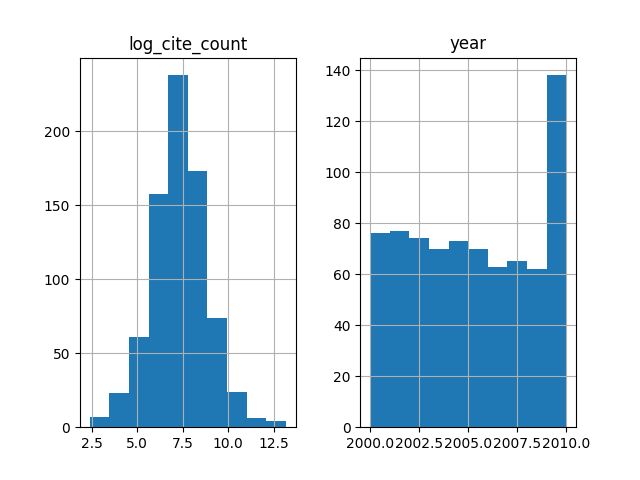

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f84f4361cf8>,
      dtype=object)

In [4]:
df[['year','log_cite_count']].hist()

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=0.01, # at min 1% of docs
                        max_df=.9,  
                        max_features=4,
                        stop_words='english',
                        ngram_range=(1,3))
X = vectorizer.fit_transform(df['opinion_text'])
words = vectorizer.get_feature_names()
print(words)
X

['act', 'congress', 'district', 'state']


<768x4 sparse matrix of type '<class 'numpy.int64'>'
	with 2534 stored elements in Compressed Sparse Row format>

In [6]:
X = X.todense()
X = X / X.sum(axis=1) # counts to frequencies
for i, word in enumerate(words):
    column = X[:,i]
    df['x_'+word] = column
df.head()

,case_name,opinion_type,date_standard,authorship,x_republican,maj_judges,dissent_judges,topic_id,cite_count,opinion_text,year,log_cite_count,authorship_id,x_act,x_congress,x_district,x_state
0,ERICK CORNELL CLAY v. UNITED STATES,majority,2003-03-04,GINSBURG,0.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],1.0,2926.0,JUSTICE GINSBURG delivered the opinion of the ...,2003,7.981392,2,0.193548,0.225806,0.161290,0.419355
1,"HILLSIDE DAIRY INC., A&A DAIRY, L&S DAIRY, AND...",majority,2003-06-09,STEVENS,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...","['THOMAS, CLARENCE']",8.0,117.0,Justice Stevens delivered the opinion of the C...,2003,4.762174,9,0.261905,0.095238,0.047619,0.595238
2,"CHARLES RUSSELL RHINES v. DOUGLAS WEBER, WARDEN",majority,2005-03-30,O'CONNOR,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],1.0,23364.0,Justice O'Connor delivered the opinion of the ...,2005,10.058952,4,0.012821,0.025641,0.461538,0.500000
3,STATE OF ALASKA v. UNITED STATES OF AMERICA,majority,2005-06-06,KENNEDY,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...","['REHNQUIST, WILLIAM', 'SCALIA, ANTONIN', 'THO...",10.0,84.0,Justice Kennedy delivered the opinion of the C...,2005,4.430817,3,0.322581,0.129032,0.000000,0.548387
4,"REGINALD A. WILKINSON, DIRECTOR, OHIO DEPARTME...",majority,2005-06-13,KENNEDY,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],4.0,4230.0,Justice Kennedy delivered the opinion of the C...,2005,8.349957,3,0.019231,0.000000,0.596154,0.384615


In [7]:
# inspecting data
import numpy as np
features = ['x_'+x for x in words]
cites_features = ['log_cite_count'] + features
df2 = df[cites_features]
corr_matrix = df2.corr()
corr_matrix['log_cite_count'].sort_values(ascending=False)

log_cite_count    1.000000
x_state           0.153254
x_district        0.111862
x_congress       -0.137626
x_act            -0.237354
Name: log_cite_count, dtype: float64

<IPython.core.display.Javascript object>


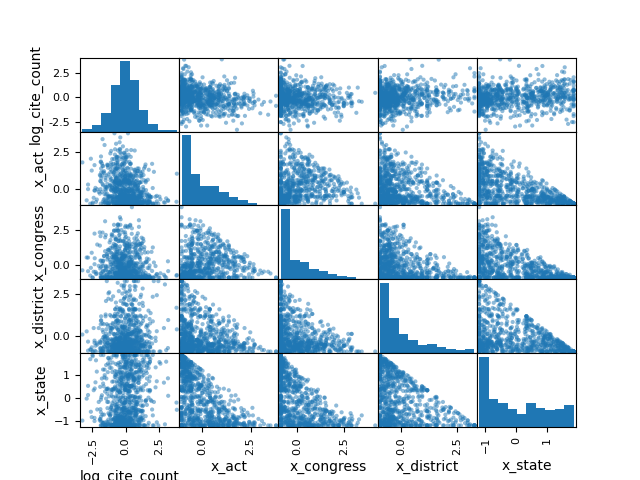

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f84c3251cf8>,
      dtype=object)

In [41]:
from pandas.plotting import scatter_matrix
scatter_matrix(df2)

<IPython.core.display.Javascript object>


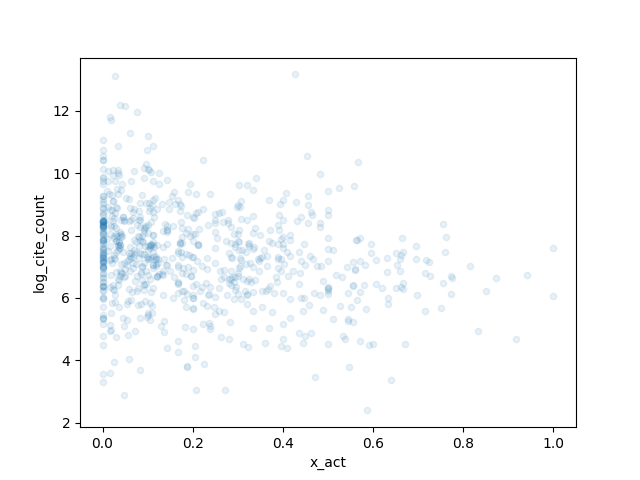

In [9]:
df2.plot(kind='scatter', x='x_act', y='log_cite_count', alpha = 0.1)

# Regression

In [10]:
# create a test set 
from sklearn.model_selection import train_test_split
train, test = train_test_split(df2, test_size=0.2)

In [11]:
# our first machine learning model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
Xtrain = train[features]
Ytrain = train['log_cite_count']
lin_reg.fit(Xtrain, Ytrain)
lin_reg.coef_ 

array([-1.05443811, -0.27079188,  0.87434979,  0.45088019])

In [12]:
# in-sample performance
from sklearn.metrics import mean_squared_error
Ytrain_pred = lin_reg.predict(Xtrain)        
train_mse = mean_squared_error(Ytrain,Ytrain_pred)
train_mse

2.1599649495666817

In [13]:
# out-of-sample performance
Xtest = test[features]
Ytest = test['log_cite_count']
Ytest_pred = lin_reg.predict(Xtest)        
test_mse = mean_squared_error(Ytest,Ytest_pred)
test_mse

2.1030016631048745

# Pipelines and Cross-Validation

In [14]:
# missing values
df['authorship_id'].fillna(0,inplace=True)

In [15]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df2)
df2 = pd.DataFrame(X,columns=df2.columns)

In [16]:
# Encoding categorical variables
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
judge = df['authorship_id']
judge_fes = encoder.fit_transform(judge.values.reshape(-1,1))
judge_ids = ['j_'+str(x) for x in range(len(judge.unique()))]
judge_fes = pd.DataFrame(judge_fes.todense(),columns=judge_ids)
df = pd.concat([df,judge_fes],axis=1)
train, test = train_test_split(df, test_size=0.2)

In [17]:
# Cross-validation
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest_reg,
                         df[features],
                         df['x_republican'],
                         cv=3,
                         n_jobs=-1)

# the default score for random forest reg is negative MSE.
print(np.abs(scores.mean()),scores.std())

0.08220420656946148 0.02780570269938838


In [18]:
# Grid Search
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [3, 10, 30],
              'max_features': [2, 4],
              'bootstrap': [True, False]}

grid_search = GridSearchCV(forest_reg, 
                           param_grid, 
                           cv=3)              
grid_search.fit(df[features],df['x_republican'])

print(grid_search.best_params_)
print(np.abs(grid_search.best_score_))

{'bootstrap': True, 'max_features': 2, 'n_estimators': 30}
0.09453092192970021


In [19]:
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(forest_reg, param_grid, cv=3)              
rand_search.fit(df[features],df['x_republican'])

print(rand_search.best_params_)
print(np.abs(rand_search.best_score_))

{'n_estimators': 30, 'max_features': 2, 'bootstrap': True}
0.05481324982532487


In [20]:
# Saving and loading
from sklearn.externals import joblib
joblib.dump(forest_reg,'forest_reg.pkl') # will overwrite local files
forest_reg = joblib.load('forest_reg.pkl')

# Regularization

In [21]:
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.linear_model import LinearRegression

m = 100
x = 6 * np.random.rand(m,1) - 3
y = 0.5 * x ** 2 + x + 2 + np.random.randn(m,1)
y = y.ravel()

from sklearn.preprocessing import PolynomialFeatures
poly_2 = PolynomialFeatures(degree=2) # also adds interactions
X_poly_2 = poly_2.fit_transform(x)


poly_300 = PolynomialFeatures(degree=300) 
X_poly_300 = poly_300.fit_transform(x)


lin_reg = LinearRegression()
cross_val_score(lin_reg, x, y, cv=3, n_jobs=3).mean()

0.11969397341349909

In [22]:
cross_val_score(lin_reg, X_poly_2, y, cv=3, n_jobs=3).mean()

0.7833932703967568

In [23]:
cross_val_score(lin_reg, X_poly_300, y, cv=3, n_jobs=3).mean()

-4.626546938630843e+26

In [24]:
# Lasso
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
cross_val_score(lasso_reg,x,y).mean()

0.2915125229718915

In [25]:
# Ridge
from sklearn.linear_model import Ridge, SGDRegressor
ridge_reg = Ridge(alpha=1)
cross_val_score(ridge_reg,x,y).mean()

0.2855737704953515

In [26]:
###
# Elastic Net
###
from sklearn.linear_model import ElasticNetCV
enet_reg = ElasticNetCV(alphas=[.0001, .001, .01,.1,1], 
                        l1_ratio=[.0001, .001, .01,.1,.5,.9, .99, 1])
enet_reg.fit(x,y)
enet_reg.alpha_, enet_reg.l1_ratio_

(0.1, 0.0001)

In [27]:
cross_val_score(enet_reg,x,y).mean()

0.29302979699612164

In [28]:
# Scaling with Sparsity
from sklearn.preprocessing import StandardScaler
sparse_scaler = StandardScaler(with_mean=False)
X_sparse = sparse_scaler.fit_transform(X)
Y = df['x_republican'].values

In [29]:
X_sparse

array([[ 0.4273395 , -0.10042156,  0.26583686, -0.25620003,  0.08875597],
       [-1.69574977,  0.2303693 , -0.38976878, -0.73332927,  0.62993863],
       [ 1.7975002 , -0.97500173, -0.73922735,  1.00407587,  0.33689649],
       ...,
       [ 0.778854  ,  0.31343437,  1.46745168, -0.54274748, -0.70067715],
       [-0.48288351,  0.47521029,  0.43962056,  0.85945227, -1.20157476],
       [ 0.20858247,  0.53243068, -0.86797524, -0.93320774,  0.87744045]])

## Feature Selection with Elastic Net

In [30]:
scaler = StandardScaler()
Xscale = scaler.fit_transform(X)
from sklearn.linear_model import ElasticNet
enet_reg = ElasticNet(alpha=.1, l1_ratio=.0001)
enet_reg.fit(Xscale,Y)
nonzero = enet_reg.coef_ != 0
print(nonzero.sum(),'non-zero of',len(enet_reg.coef_),'coefficients.')
X_enet = X[:,nonzero]
X_enet
cross_val_score(enet_reg,X_enet,Y,n_jobs=-1).mean()

5 non-zero of 5 coefficients.


0.009194244568332843

# Classification

In [31]:
# Make a small data set
df = pd.read_pickle('sc_cases_cleaned.pkl',compression='gzip')
df=df.reset_index(drop=True)

from sklearn.feature_extraction.text import CountVectorizer
vectorizer500 = CountVectorizer(min_df=0.01, # at min 1% of docs
                        max_df=.9,  
                        max_features=500,
                        stop_words='english',
                        ngram_range=(1,3))
X500 = vectorizer500.fit_transform(df['opinion_text']).todense()
X500 = X500 / X500.sum(axis=1) # counts to frequencies
vocab = vectorizer500.get_feature_names()
for i, word in enumerate(vectorizer500.get_feature_names()):
    column = X500[:,i]
    df['x_'+word] = column


features = [x for x in df.columns if x.startswith('x_') and x!="x_republican"]
keepcols = ['x_republican'] + features
df1 = df[keepcols]
y = df1['x_republican']
# set up train/test split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df1, test_size=0.2)
features = [x for x in df1.columns if x.startswith('x_') and x!="x_republican"]

In [32]:
# Binary Classifier
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=10) 
sgd_clf.fit(train[features], train['x_republican'])
sgd_clf.score(test[features],test['x_republican']) # accuracy on held-out data

0.7662337662337663

In [33]:
# compare to picking largest category
df1['x_republican'].mean()

0.7734375

In [36]:
from multiprocessing import cpu_count
nthreads = cpu_count() - 1

# Form cross-validated prdictions for all data points
from sklearn.model_selection import cross_val_predict
df1['x_republican_sgd'] = cross_val_predict(sgd_clf,
                                         df1[features],
                                         df1['x_republican'],
                                         cv=3,
                                         n_jobs=nthreads)

In [37]:
# Construct confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(df1['x_republican'], df1['x_republican_sgd'])

array([[ 58, 116],
       [190, 404]])

In [38]:
# Precision and Recall
from sklearn.metrics import precision_score, recall_score
print('Precision:',precision_score(df1['x_republican'], df1['x_republican_sgd']))
print('Recall:',recall_score(df1['x_republican'], df1['x_republican_sgd']))

Precision: 0.7769230769230769
Recall: 0.6801346801346801


In [39]:
#F1 score
from sklearn.metrics import f1_score
f1_score(df1['x_republican'],df1['x_republican_sgd'])

0.7253141831238779

<IPython.core.display.Javascript object>


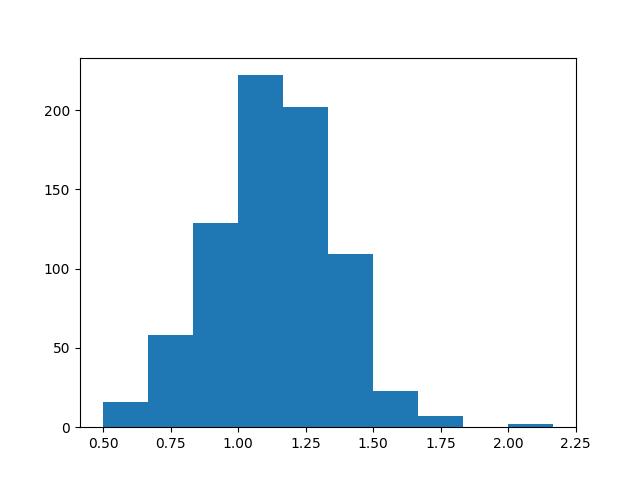

(array([ 16.,  58., 129., 222., 202., 109.,  23.,   7.,   0.,   2.]),
 array([0.49801458, 0.66497948, 0.83194438, 0.99890927, 1.16587417,
        1.33283906, 1.49980396, 1.66676886, 1.83373375, 2.00069865,
        2.16766354]),
 <a list of 10 Patch objects>)

In [42]:
##############
# Precision/Recall Trade Off
##############
# scores used by SGDClassifier
import matplotlib.pyplot as plt

y_scores = sgd_clf.decision_function(df[features])
plt.hist(y_scores) # histogram of scores

In [43]:
# prediction using default threshold ... 
threshold = 0
(y_scores > threshold).mean()

1.0

In [44]:
# ... gives default model prediction
ypred = sgd_clf.predict(df[features])
ypred.mean()

1.0

In [45]:
# increasing threshold means more zeros are predicted
threshold = 1
(y_scores > threshold).mean()

0.7356770833333334

<IPython.core.display.Javascript object>


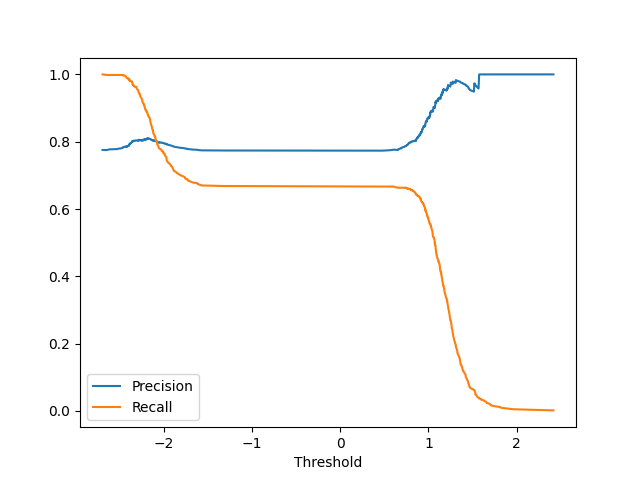

In [46]:
# Visualizing the precision/recall tradeoff
y_scores = cross_val_predict(sgd_clf,
                             df1[features],
                             df1['x_republican'],
                             cv=3,
                             method='decision_function',
                             n_jobs=3)

from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(df1['x_republican'], y_scores)

import matplotlib.pyplot as plt
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel('Threshold')
plt.legend()

<IPython.core.display.Javascript object>


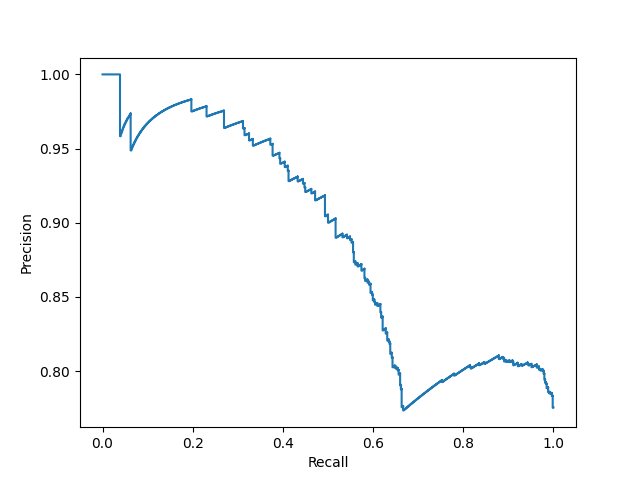

Text(0, 0.5, 'Precision')

In [47]:
# Plot precision vs recall
plt.step(recalls, precisions)
plt.xlabel('Recall')
plt.ylabel('Precision')

In [48]:
# Assessing other scoring thresholds
ypred_lower = y_scores > -1
ypred_higher = y_scores > 1

print('Precision for Low Threshold:',precision_score(y, ypred_lower))
print('Precision for High Threshold:',precision_score(y, ypred_higher))
print('Recall for Low Threshold:',recall_score(y, ypred_lower))
print('Recall for High Threshold:',recall_score(y, ypred_higher))

Precision for Low Threshold: 0.7734375
Precision for High Threshold: 0.8717948717948718
Recall for Low Threshold: 0.6666666666666666
Recall for High Threshold: 0.5723905723905723


<IPython.core.display.Javascript object>


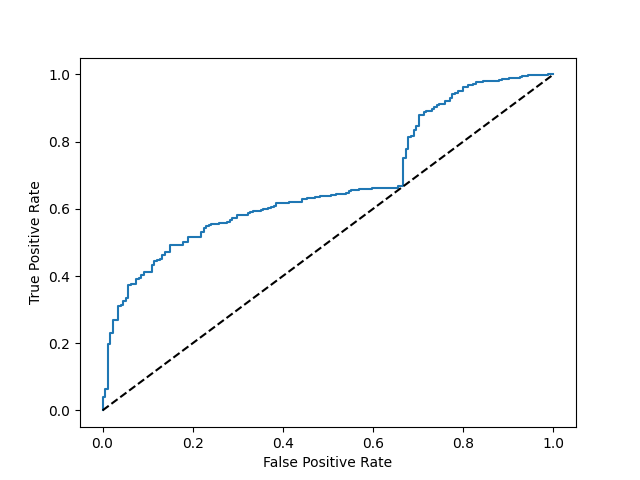

Text(0, 0.5, 'True Positive Rate')

In [49]:
# ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, y_scores)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [50]:
# AUC
from sklearn.metrics import roc_auc_score
roc_auc_score(y, y_scores)

0.6795638376098145

<IPython.core.display.Javascript object>


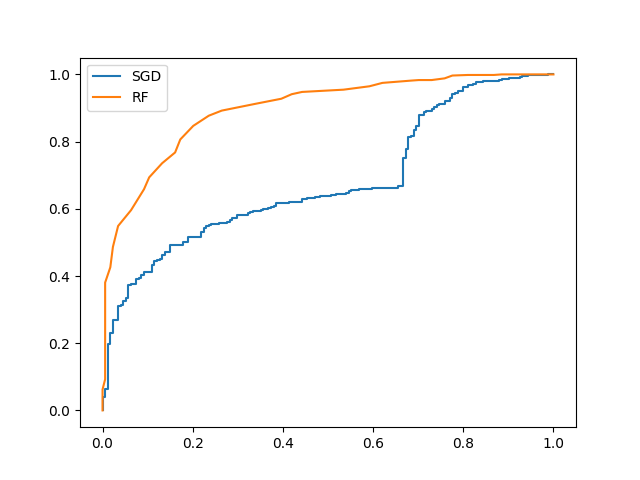

In [51]:
# Random Forests and predict_proba()
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
y_probas_rfc = cross_val_predict(rfc,
                                 X500,
                                 y,
                                 cv=3,
                                 method='predict_proba',
                                 n_jobs=3)

y_scores_rfc = y_probas_rfc[:,1]
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y,y_scores_rfc) 

# compare precision/recall tradeoff for SGD and RF classifiers
plt.plot(fpr, tpr, label="SGD")
plt.plot(fpr_rfc, tpr_rfc, label="RF")
plt.legend()

In [52]:
roc_auc_score(y,y_scores_rfc)

0.8963291923062038

In [55]:
###
# Multinomial CLassification
###
author = df['authorship']
authpred = cross_val_predict(sgd_clf,
                              X500,
                              author,
                              cv=7)
print((authpred == author).mean())
list(zip(author[:8],authpred[:8]))

0.20052083333333334


[('GINSBURG', 'THOMAS'),
 ('STEVENS', 'STEVENS'),
 ("O'CONNOR", 'KENNEDY'),
 ('KENNEDY', 'SOUTER'),
 ('KENNEDY', 'KENNEDY'),
 ('SOUTER', 'SOUTER'),
 ('BREYER', 'SOUTER'),
 ('GINSBURG', 'SCALIA')]

<IPython.core.display.Javascript object>


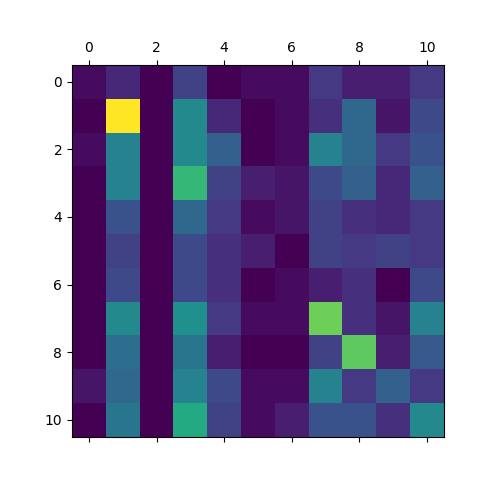

In [56]:
# Multi-class confusion matrix
conf_mx = confusion_matrix(author,authpred)
conf_mx
plt.matshow(conf_mx)
plt.show()

<IPython.core.display.Javascript object>


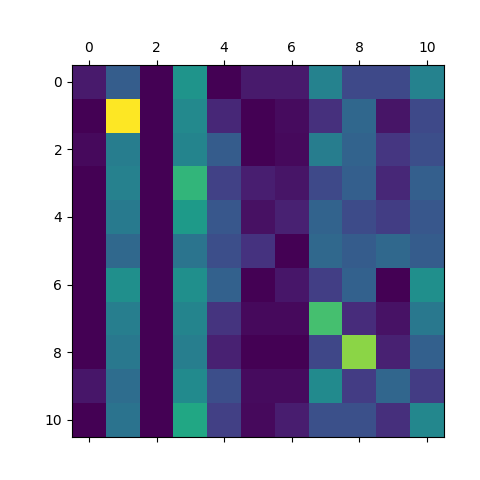

In [57]:
# normalize colors
conf_mx_norm = conf_mx / conf_mx.sum(axis=1, keepdims=True)
plt.matshow(conf_mx_norm)

## Multinomial Logistic

In [58]:

from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(C=1, # default L2 penalty # .01, .1, 1, 2, 10
                              class_weight='balanced')

scores = cross_val_score(logistic,
                         X_sparse[:1000],
                         author[:1000],
                         cv=3,
                         n_jobs=3)

scores.mean(), scores.std()

(0.09765625, 0.01390244564066577)

# Ensemble Learning

In [59]:
Y = df1['x_republican'] > 0

# Bagging classifier

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
        DecisionTreeClassifier(), n_estimators=50,
        max_samples=100, bootstrap=True, n_jobs=-1
    )

cross_val_score(bag_clf, X500, Y).mean()

0.7981835158305746

In [60]:
# random forest
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, 
                                 max_leaf_nodes=16, 
                                 n_jobs=-1)
y_pred_rf = cross_val_predict(rnd_clf, X500, Y)                              
confusion_matrix(Y,y_pred_rf)

array([[  1, 173],
       [  0, 594]])

In [61]:
rnd_clf.fit(X500,Y)
feature_importances = rnd_clf.feature_importances_
sorted(zip(feature_importances, word), reverse=False)

[(0.00036198049501784575, 'k'),
 (0.0018341473883139575, 'o'),
 (0.0023754710888548255, 'y'),
 (0.0034651061104869476, 'r')]

In [62]:
# XGBoost
from xgboost import XGBClassifier, XGBRegressor
dfX = pd.DataFrame(X500,columns=vocab)
xgb_clf = XGBClassifier()
cross_val_score(xgb_clf, dfX, Y).mean()

0.8749681690858161

In [63]:
xgb_reg = XGBRegressor(feature_names=vocab)
xgb_reg.fit(dfX,Y)
sorted(zip(xgb_reg.feature_importances_, vocab),reverse=True)[:10]

[(0.033571467, 'analysis'),
 (0.031830117, 'new york'),
 (0.029660394, 'granted certiorari'),
 (0.026276005, 'sought'),
 (0.025258552, 'related'),
 (0.02393513, 'stated'),
 (0.023086436, 'internal quotation'),
 (0.021765428, 'require'),
 (0.021112507, 'light'),
 (0.021009024, 'added')]

<IPython.core.display.Javascript object>


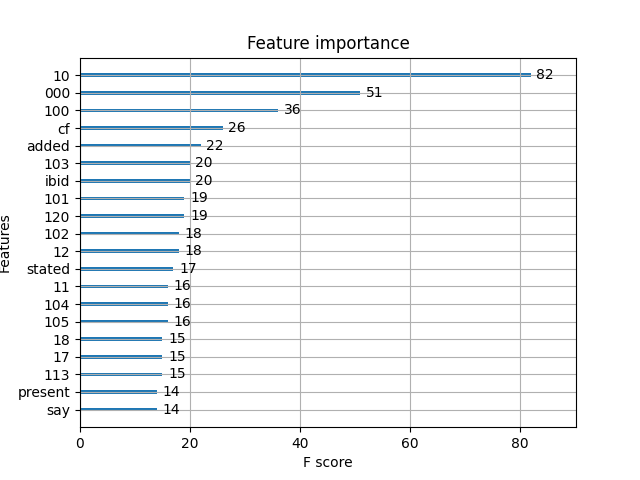

In [64]:
from xgboost import plot_importance
plot_importance(xgb_reg, max_num_features=20)